# Modeling

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt 

**Key steps**
- Choosing a number of clusters
- Running k-means clustering on pre-processed data
- Analyzing average RFM values of each cluster

### Method to define the number of cluster

In [19]:
dfNormalized = pd.read_csv('./data/05-DataPrepared.csv')
dfRaw = pd.read_csv('./data/05-DataPrepared.csv')

In [20]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(dfNormalized)

KMeans(n_clusters=2, random_state=1)

In [21]:
cluster_labels = kmeans.labels_
cluster_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

## Choosing the right amount of clusters

**Elbow criteria method**: Plot the number of clusters against within cluster-sum-of-squared-errors
Sum of squared distances from every data point to their cluster center

- Identify an elbow: that point shows where there are diminishing returns by increasing the number of clusters
- Elbow represents the optimal number of clusters from a sum-of-squared errors perspective

#### Elbow criterion method

In [25]:
## Fit KMeans and calculates SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(dfNormalized)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center

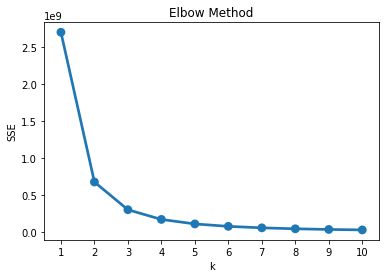

In [27]:
## Plot SSE for each *k*
plt.title('Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()